<a href="https://colab.research.google.com/github/riyaditi/CodeSoft-Python_Tasks/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!git clone https://github.com/PratikBhawkar/secure_pass_backend.git
%cd secure_pass_backend

Cloning into 'secure_pass_backend'...
remote: Enumerating objects: 9815, done.
remote: Total 9815 (delta 0), reused 0 (delta 0), pack-reused 9815 (from 2)
Receiving objects: 100% (9815/9815), 703.39 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Updating files: 100% (12885/12885), done.
/content/secure_pass_backend/secure_pass_backend


In [19]:
!pip install paddleocr paddlepaddle
!pip install ultralytics
!pip install opencv-python
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=df2e48a56782d03867a271bd33c43f92de9afc43968f54af8c0f404a78ebe80b
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      S

In [21]:
from ultralytics import YOLO
model = YOLO('/content/secure_pass_backend/yolo11n.pt')  # Ensure this path is correct


0: 640x384 3 motorcycles, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


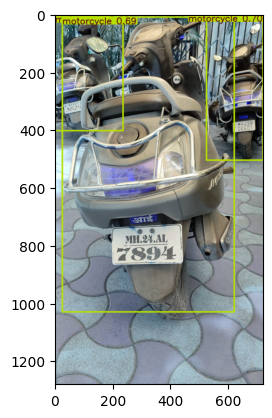

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/secure_pass_backend/data/our-database/sample.jpg'  # Replace with your image path
image = cv2.imread(image_path)
results = model(image)
#results.show()
plt.imshow(results[0].plot())  # Assuming results[0] contains the prediction with the image.
plt.show()

In [26]:
import os

# Create a directory to save cropped images
os.makedirs('cropped_plates', exist_ok=True)

# Iterate through detection results
for i, result in enumerate(results):
    for j, box in enumerate(result.boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        cropped_plate = image[y1:y2, x1:x2]
        cropped_path = f'cropped_plates/plate_{i}_{j}.jpg'
        cv2.imwrite(cropped_path, cropped_plate)

In [27]:
from paddleocr import PaddleOCR

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Iterate through cropped images and perform OCR
for cropped_image in os.listdir('cropped_plates'):
    cropped_path = os.path.join('cropped_plates', cropped_image)
    result = ocr.ocr(cropped_path, cls=True)
    for line in result[0]:
        print(f"Detected Text: {line[1][0]} with Confidence: {line[1][1]:.2f}")

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:00<00:00, 4927.70it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:00<00:00, 11299.76it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:00<00:00, 3132.64it/s]

[2025/04/13 10:31:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

[2025/04/13 10:31:49] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.09169554710388184
[2025/04/13 10:31:49] ppocr DEBUG: cls num  : 2, elapsed : 0.025878429412841797
[2025/04/13 10:31:49] ppocr DEBUG: rec_res num  : 2, elapsed : 0.12417268753051758
Detected Text: MH428 with Confidence: 0.90
Detected Text: 06601 with Confidence: 0.99
[2025/04/13 10:31:49] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.2571249008178711
[2025/04/13 10:31:49] ppocr DEBUG: cls num  : 6, elapsed : 0.028275728225708008
[2025/04/13 10:31:49] ppocr DEBUG: rec_res num  : 6, elapsed : 0.20661354064941406
Detected Text: 8629 with Confidence: 0.99
Detected Text: MH.24.AL with Confidence: 0.94
Detected Text: 789 with Confidence: 0.99
[2025/04/13 10:31:49] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05605125427246094
[2025/04/13 10:31:49] ppocr DEBUG: cls num  : 1, elapsed : 0.024573087692260742
[2025/04/13 10:31:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07053971290588379
Detected Text: 8629 with Confidence: 0.99


In [10]:
import easyocr

reader = easyocr.Reader(['en'])
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cropped = image[y1:y2, x1:x2]
        ocr_result = reader.readtext(cropped)
        text = ' '.join([res[1] for res in ocr_result])
        # Store text in database...

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [28]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect('secure_pass_paddle.db')
cursor = conn.cursor()

# Create a table if it doesn't already exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS number_plate_text (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        image_name TEXT,
        extracted_text TEXT,
        confidence REAL
    )
''')
conn.commit()


In [29]:
import os

# Path to folder with cropped number plates
cropped_folder = 'cropped_plates'

# Loop through all images
for image_file in os.listdir(cropped_folder):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(cropped_folder, image_file)
        result = ocr.ocr(img_path, cls=True)

        for line in result[0]:
            text = line[1][0]
            confidence = float(line[1][1])

            # Store in database
            cursor.execute('''
                INSERT INTO number_plate_text (image_name, extracted_text, confidence)
                VALUES (?, ?, ?)
            ''', (image_file, text, confidence))
            conn.commit()


[2025/04/13 10:34:04] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.037326812744140625
[2025/04/13 10:34:04] ppocr DEBUG: cls num  : 2, elapsed : 0.009528636932373047
[2025/04/13 10:34:04] ppocr DEBUG: rec_res num  : 2, elapsed : 0.07211804389953613
[2025/04/13 10:34:04] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.16617059707641602
[2025/04/13 10:34:04] ppocr DEBUG: cls num  : 6, elapsed : 0.01677703857421875
[2025/04/13 10:34:04] ppocr DEBUG: rec_res num  : 6, elapsed : 0.18013739585876465
[2025/04/13 10:34:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.030100584030151367
[2025/04/13 10:34:05] ppocr DEBUG: cls num  : 1, elapsed : 0.008785247802734375
[2025/04/13 10:34:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04833388328552246


In [30]:
import pandas as pd

df = pd.read_sql_query("SELECT * FROM number_plate_text", conn)
df.head()

,id,image_name,extracted_text,confidence
0,1,plate_0_0.jpg,MH428,0.900004
1,2,plate_0_0.jpg,06601,0.994183
2,3,plate_0_1.jpg,8629,0.991003
3,4,plate_0_1.jpg,MH.24.AL,0.944938
4,5,plate_0_1.jpg,789,0.992284


In [ ]:
conn.close()

In [11]:
import sqlite3
from datetime import datetime

conn = sqlite3.connect('secure_pass.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS detections (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    image_path TEXT,
    detected_text TEXT,
    timestamp TEXT
)
''')
conn.commit()

In [12]:
cursor.execute('''
    INSERT INTO detections (image_path, detected_text, timestamp)
    VALUES (?, ?, ?)
''', (image_path, text, datetime.now().isoformat()))
conn.commit()

In [14]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('access_logs',), ('number_plates',), ('authorized_vehicles',), ('detections',), ('sqlite_sequence',)]


In [16]:
import pandas as pd

# Read data from the 'detections' table into a DataFrame
df = pd.read_sql_query("SELECT * FROM detections;", conn)

# Display the DataFrame
print(df)

   id                                         image_path detected_text  \
0   1  /content/secure_pass_backend/data/our-database...                 

                    timestamp  
0  2025-04-13T10:11:07.276049  


In [18]:
import pandas as pd

# Read data from the 'detections' table into a DataFrame
df = pd.read_sql_query("SELECT * FROM authorized_vehicles;", conn)

# Display the DataFrame
print(df)


    id                                   plate_number owner_name vehicle_type
0    1                                        MH.24AL      Viper         Bike
1    2                                  MHIGD N987O 1     Rocket         Bike
2    3                                        TONONIT    Thunder         Bike
3    4                                  MH.12 FX 86O9      Flash         Bike
4    5                                    MHIZV O3O19  Speedster         Bike
..  ..                                            ...        ...          ...
58  59                                 MH 13CF 6 5833      Viper         Bike
59  60                              3 U '| 2XU 8814 D  Lightning         Bike
60  61  O4 M IA 9 62 M "O "6 HTZX [ M 4 7 LU81 44 9 A    Cyclone         Bike
61  62                       MHZ9C C6632 8O316-8-83 5       Bolt         Bike
62  63                           MH1ZU TOONENTT V3528    Cyclone         Bike

[63 rows x 4 columns]


In [31]:
# Step 1: Install Required Libraries
!pip install paddleocr paddlepaddle ultralytics opencv-python matplotlib jiwer

In [32]:
# Step 2: Imports
import os
import cv2
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from paddleocr import PaddleOCR
from jiwer import cer, wer

In [33]:
# Step 3: Setup OCR and SQLite
ocr = PaddleOCR(use_angle_cls=True, lang='en')
conn = sqlite3.connect('secure_pass_pad.db')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS number_plate_text (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        image_name TEXT,
        extracted_text TEXT,
        confidence REAL
    )
''')
conn.commit()

[2025/04/13 10:41:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

In [34]:
# Step 4: Preprocessing Function
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    resized = cv2.resize(thresh, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    denoised = cv2.fastNlMeansDenoising(resized, h=30)
    return denoised

In [37]:
# Step 5: OCR + Save to DB + Accuracy Calculation
cropped_folder = '/content/secure_pass_backend/data/custom_dataset/images/train'  # your folder with cropped YOLO detections
ground_truths = {  # Replace with your real labels
    'plate_0_0.jpg': 'MH12AB1234',
    'plate_1_0.jpg': 'DL8CAF5678'
}

for image_file in os.listdir(cropped_folder):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(cropped_folder, image_file)
        processed_img = preprocess_image(img_path)
        temp_path = 'temp.jpg'
        cv2.imwrite(temp_path, processed_img)

        result = ocr.ocr(temp_path, cls=True)
        # Check if result is valid and not empty before iterating
        if result and result[0]:
            for line in result[0]:
                text = line[1][0]
                confidence = float(line[1][1])

                # Save to DB
                cursor.execute('''
                    INSERT INTO number_plate_text (image_name, extracted_text, confidence)
                    VALUES (?, ?, ?)
                ''', (image_file, text, confidence))
                conn.commit()

                # Accuracy Check
                if image_file in ground_truths:
                    gt = ground_truths[image_file]
                    print(f"\nImage: {image_file}")
                    print("GT:", gt)
                    print("OCR:", text)
                    print("CER:", cer(gt, text))
                    print("WER:", wer(gt, text))
        else:
            print(f"Warning: No text detected in {image_file}. Skipping...")

Streaming output truncated to the last 5000 lines.
[2025/04/13 11:05:06] ppocr DEBUG: rec_res num  : 2, elapsed : 0.10048556327819824
[2025/04/13 11:05:07] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.10852599143981934
[2025/04/13 11:05:07] ppocr DEBUG: cls num  : 2, elapsed : 0.018619775772094727
[2025/04/13 11:05:07] ppocr DEBUG: rec_res num  : 2, elapsed : 0.10140013694763184
[2025/04/13 11:05:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1198275089263916
[2025/04/13 11:05:07] ppocr DEBUG: cls num  : 1, elapsed : 0.015954971313476562
[2025/04/13 11:05:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06373190879821777
[2025/04/13 11:05:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06010270118713379
[2025/04/13 11:05:07] ppocr DEBUG: cls num  : 1, elapsed : 0.015897512435913086
[2025/04/13 11:05:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10435819625854492
[2025/04/13 11:05:08] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.11255383491516113
[2025/04/13 11:05:08] ppocr DEBUG: cls num  : 

In [38]:
# Step 6: Display Data
print("\nDatabase Content:")
df = pd.read_sql_query("SELECT * FROM number_plate_text", conn)
print(df)


Database Content:
        id                                         image_name extracted_text  \
0        1                                 License (1412).png           P80B   
1        2                                 License (1412).png             BP   
2        3                                 License (1412).png           1616   
3        4  17b9eb3b18a86ac4_jpg.rf.53cbbe6208f94a2b2e6ce0...           Uhil   
4        5  17b9eb3b18a86ac4_jpg.rf.53cbbe6208f94a2b2e6ce0...         KC7I1B   
...    ...                                                ...            ...   
3851  3852  c9afcyqbvroa1_jpg.rf.f7d2d26d6afd2771d7167a11c...        URMYDOT   
3852  3853                                  License (375).png              H   
3853  3854                                  License (375).png    DECCAN HOMD   
3854  3855                                  License (375).png  MH-I2 DY 5676   
3855  3856                                 License (1355).png   MH.07.Q.3643   

      confidence  
0

In [39]:
# Cleanup
conn.close()
if os.path.exists('temp.jpg'):
    os.remove('temp.jpg')